In [64]:
import numpy as np
import seaborn as sns
import os, sys
from matplotlib import pyplot as plt
from sklearn import metrics

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

CURRENT_DIR = os.path.dirname(os.path.abspath("rare_pattern_detect"))
sys.path.append(os.path.dirname(CURRENT_DIR))

from rare_pattern_detect.patterns import PatternSpace, PatternSpaceType
from rare_pattern_detect.rare_pattern_detect import RarePatternDetect
from rare_pattern_detect.pattern_space_utils import draw_largest_bounding_area, draw2dpattern

# Evaluating 20 data points (10 anomalies and 10 normal points) using 200 training points

In [65]:
# # Loading the data
with np.load('../ADBench-main/datasets/Classical/16_http.npz') as data:
    X = data['X']
    y = data['y']
    idx = np.random.permutation(len(X))
    X,y = X[idx], y[idx]

In [66]:
X

array([[-2.30258509,  5.38035808,  8.98169421],
       [-2.30258509,  5.45574837,  6.85023209],
       [-2.30258509,  5.80242044,  7.4218356 ],
       ...,
       [-2.30258509,  5.36176154,  8.47660034],
       [-2.30258509,  5.85535841,  7.58989207],
       [-2.30258509,  5.46425544,  7.363343  ]])

In [67]:
TRAINING_LIMIT = 300
TESTING_INDICES = -20 
TRAINING_ANOMALIES_INDICES = 30 

anomalies_indices = [i for i, j in enumerate(y) if j == 1]

normal_indices = [i for i, j in enumerate(y) if j != 1]

print("anomalies_indices: ", len(anomalies_indices))

print("normal_indices: ", len(normal_indices))

testing_anomalies_indices = anomalies_indices[TESTING_INDICES:]

testing_normal_indices = normal_indices[TESTING_INDICES:]

training_normal_indices = normal_indices[:TRAINING_LIMIT]

training_anomalies_indices = anomalies_indices[:TRAINING_ANOMALIES_INDICES]

testing_indices = np.concatenate((testing_anomalies_indices, testing_normal_indices))

testing_labels = y[testing_indices]

y = testing_labels

anomalies_indices:  2211
normal_indices:  565287


In [68]:
# training_set = np.array(X[training_normal_indices])

training_set = np.array(np.concatenate((X[training_normal_indices],X[training_anomalies_indices])))

testing_set = np.array(np.concatenate((X[testing_anomalies_indices],X[testing_normal_indices])))

# 3D scatter plot

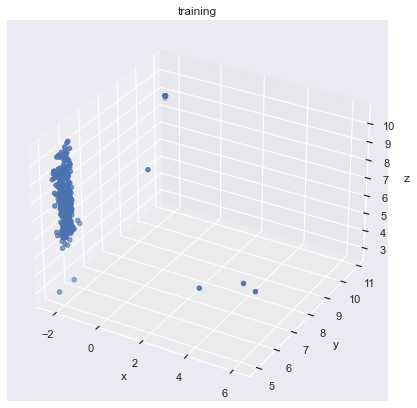

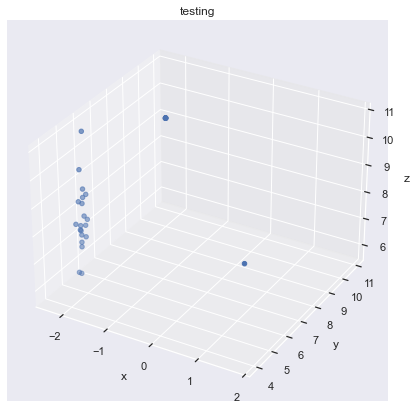

In [69]:
# training_set

from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

def scatter_plot_3d(set, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    x = set[:,0]
    y = set[:,1]
    z = set[:,2]

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.scatter(x, y, z)
    ax.set_title(f"{title}")
    
    plt.show()

scatter_plot_3d(training_set, "training")
scatter_plot_3d(testing_set, "testing")

In [70]:
def calculate_f_hats(training_set, testing_set, y, min_area):
    initial_tau = 0.1
    epsilon = 0.1
    delta = 0.1

    print(f"num datapoints: {len(y)}")


    rpd = RarePatternDetect(
        delta=delta,
        tau=initial_tau,
        epsilon=epsilon,
        pattern_space = PatternSpace(
            type = PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
            cutoff = min_area
        )
    )

    rpd.fit(training_data=training_set, testing_data=testing_set)
    preds = []
    f_hats = []
    print("number of points to be classified: ", len(testing_set))
    for i, point_to_be_classified in enumerate(testing_set):
        # if i % 10 == 0: 
        print(f"----- {i} data points processed -----")
        model, prediction = rpd.predict_score(point_to_be_classified)
        preds.append(prediction)
        f_hats.append(model.minimized_f_hats) # [i])

    return f_hats

def evaluate_fhat_distribution(f_hats, min_area):
    ## Evaluating the f_hat distributions 
    indices = [i for i, j in enumerate(y) if j == 1]
    fhat_anomelies = [f_hats[i] for i, j in enumerate(indices)]
    fhat_normal = [j for i, j in enumerate(f_hats) if i not in indices]

    sns.histplot(fhat_normal, label=y, color="green")
    sns.histplot(fhat_anomelies, label=y, color="blue")
    plt.legend(labels=["normal","anormalies"])
    plt.title(f"f_hat distribution for min_area:{min_area}")
    plt.show()


iteration:  0
num datapoints: 40
cutoff (patterns.py):  31
testing_data not empty
number of points to be classified:  40
----- 0 data points processed -----
----- 1 data points processed -----
point to be classified outside of the limits: anomaly
----- 2 data points processed -----
----- 3 data points processed -----
----- 4 data points processed -----
----- 5 data points processed -----
----- 6 data points processed -----
----- 7 data points processed -----
----- 8 data points processed -----
----- 9 data points processed -----
----- 10 data points processed -----
----- 11 data points processed -----
----- 12 data points processed -----
----- 13 data points processed -----
----- 14 data points processed -----
----- 15 data points processed -----
----- 16 data points processed -----
----- 17 data points processed -----
----- 18 data points processed -----
----- 19 data points processed -----
----- 20 data points processed -----
----- 21 data points processed -----
point to be classifie

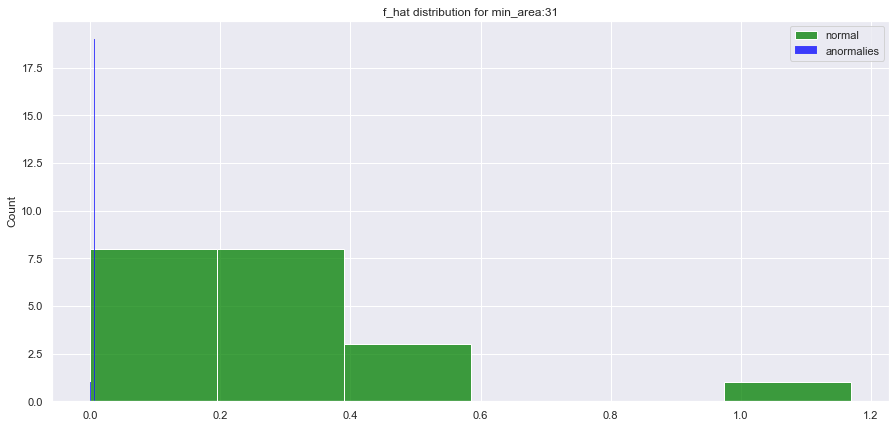

––– ––– ––– new round: i=0, mu :0.060000000000000005  ––– ––– –––
 correct results: 34,  percentage: 0.85
––– ––– ––– new round: i=1, mu :0.07  ––– ––– –––
 correct results: 34,  percentage: 0.85
––– ––– ––– new round: i=2, mu :0.08  ––– ––– –––
 correct results: 34,  percentage: 0.85
––– ––– ––– new round: i=3, mu :0.09  ––– ––– –––
 correct results: 34,  percentage: 0.85
––– ––– ––– new round: i=4, mu :0.1  ––– ––– –––
 correct results: 34,  percentage: 0.85
––– ––– ––– new round: i=5, mu :0.15000000000000002  ––– ––– –––
 correct results: 32,  percentage: 0.8
––– ––– ––– new round: i=6, mu :0.25  ––– ––– –––
 correct results: 31,  percentage: 0.775
––– ––– ––– new round: i=7, mu :0.55  ––– ––– –––
 correct results: 21,  percentage: 0.525
––– ––– ––– new round: i=8, mu :0.75  ––– ––– –––
 correct results: 21,  percentage: 0.525
––– ––– ––– new round: i=9, mu :1.05  ––– ––– –––
 correct results: 21,  percentage: 0.525
auroc:  0.85
auroc:  0.85
auroc:  0.85
auroc:  0.85
auroc:  0.85
au

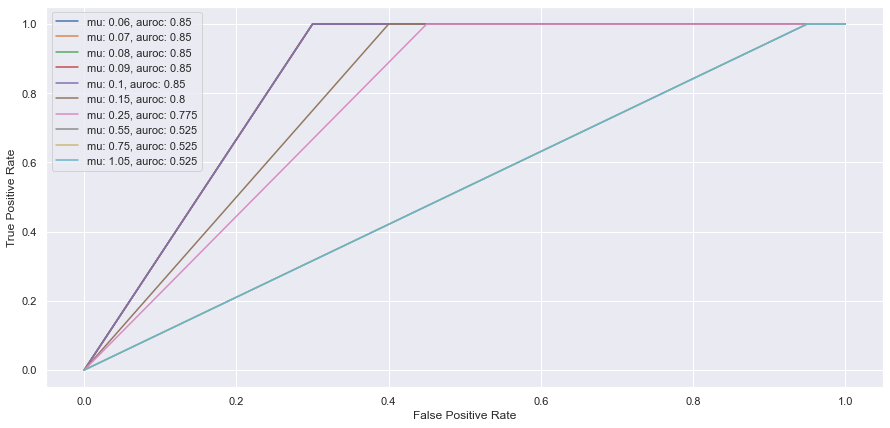

iteration:  1
num datapoints: 40
cutoff (patterns.py):  35
testing_data not empty
number of points to be classified:  40
----- 0 data points processed -----
----- 1 data points processed -----
point to be classified outside of the limits: anomaly
----- 2 data points processed -----
----- 3 data points processed -----
----- 4 data points processed -----
----- 5 data points processed -----
----- 6 data points processed -----
----- 7 data points processed -----
----- 8 data points processed -----
----- 9 data points processed -----
----- 10 data points processed -----
----- 11 data points processed -----
----- 12 data points processed -----
----- 13 data points processed -----
----- 14 data points processed -----
----- 15 data points processed -----
----- 16 data points processed -----
----- 17 data points processed -----
----- 18 data points processed -----
----- 19 data points processed -----
----- 20 data points processed -----
----- 21 data points processed -----
point to be classifie

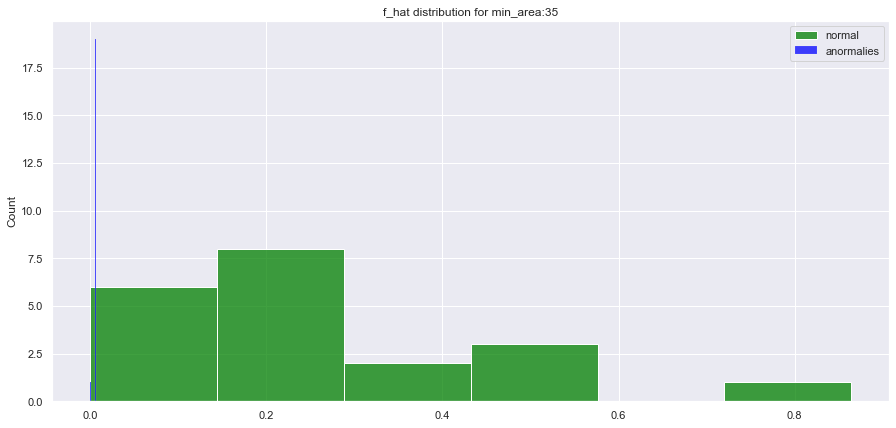

––– ––– ––– new round: i=0, mu :0.060000000000000005  ––– ––– –––
 correct results: 35,  percentage: 0.875
––– ––– ––– new round: i=1, mu :0.07  ––– ––– –––
 correct results: 35,  percentage: 0.875
––– ––– ––– new round: i=2, mu :0.08  ––– ––– –––
 correct results: 35,  percentage: 0.875
––– ––– ––– new round: i=3, mu :0.09  ––– ––– –––
 correct results: 35,  percentage: 0.875
––– ––– ––– new round: i=4, mu :0.1  ––– ––– –––
 correct results: 35,  percentage: 0.875
––– ––– ––– new round: i=5, mu :0.15000000000000002  ––– ––– –––
 correct results: 33,  percentage: 0.825
––– ––– ––– new round: i=6, mu :0.25  ––– ––– –––
 correct results: 30,  percentage: 0.75
––– ––– ––– new round: i=7, mu :0.55  ––– ––– –––
 correct results: 21,  percentage: 0.525
––– ––– ––– new round: i=8, mu :0.75  ––– ––– –––
 correct results: 21,  percentage: 0.525
––– ––– ––– new round: i=9, mu :1.05  ––– ––– –––
 correct results: 20,  percentage: 0.5
auroc:  0.875
auroc:  0.875
auroc:  0.875
auroc:  0.875
auroc: 

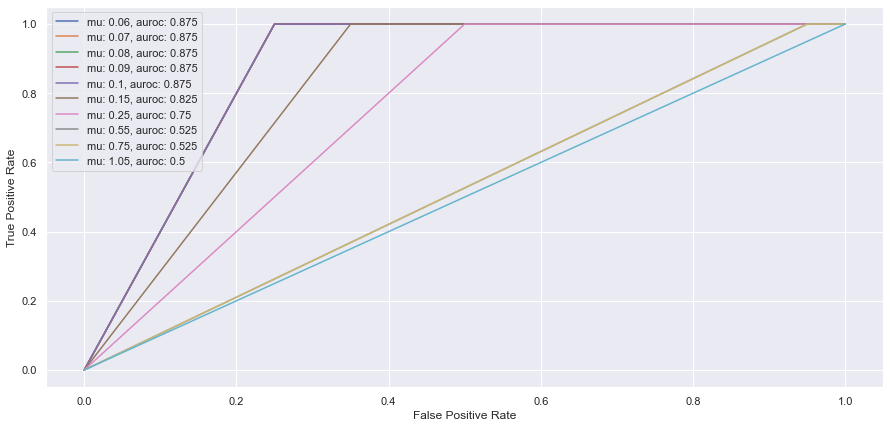

iteration:  2
num datapoints: 40
cutoff (patterns.py):  41
testing_data not empty
number of points to be classified:  40
----- 0 data points processed -----
----- 1 data points processed -----
point to be classified outside of the limits: anomaly
----- 2 data points processed -----
----- 3 data points processed -----
----- 4 data points processed -----
----- 5 data points processed -----
----- 6 data points processed -----
----- 7 data points processed -----
----- 8 data points processed -----
----- 9 data points processed -----
----- 10 data points processed -----
----- 11 data points processed -----
----- 12 data points processed -----
----- 13 data points processed -----
----- 14 data points processed -----
----- 15 data points processed -----
----- 16 data points processed -----
----- 17 data points processed -----
----- 18 data points processed -----
----- 19 data points processed -----
----- 20 data points processed -----
----- 21 data points processed -----
point to be classifie

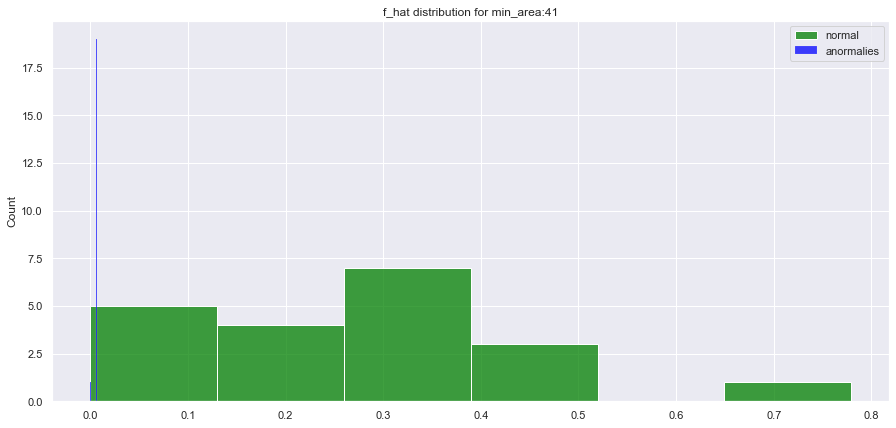

––– ––– ––– new round: i=0, mu :0.060000000000000005  ––– ––– –––
 correct results: 36,  percentage: 0.9
––– ––– ––– new round: i=1, mu :0.07  ––– ––– –––
 correct results: 36,  percentage: 0.9
––– ––– ––– new round: i=2, mu :0.08  ––– ––– –––
 correct results: 36,  percentage: 0.9
––– ––– ––– new round: i=3, mu :0.09  ––– ––– –––
 correct results: 36,  percentage: 0.9
––– ––– ––– new round: i=4, mu :0.1  ––– ––– –––
 correct results: 36,  percentage: 0.9
––– ––– ––– new round: i=5, mu :0.15000000000000002  ––– ––– –––
 correct results: 34,  percentage: 0.85
––– ––– ––– new round: i=6, mu :0.25  ––– ––– –––
 correct results: 31,  percentage: 0.775
––– ––– ––– new round: i=7, mu :0.55  ––– ––– –––
 correct results: 21,  percentage: 0.525
––– ––– ––– new round: i=8, mu :0.75  ––– ––– –––
 correct results: 21,  percentage: 0.525
––– ––– ––– new round: i=9, mu :1.05  ––– ––– –––
 correct results: 20,  percentage: 0.5
auroc:  0.9
auroc:  0.9
auroc:  0.9
auroc:  0.9
auroc:  0.9
auroc:  0.85


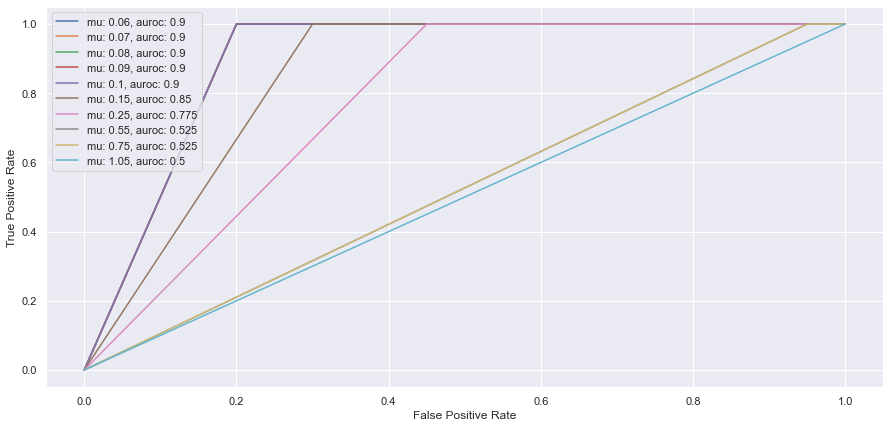

In [71]:
# creating a range of taus
taus = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.5, 0.7, 1.0]  # , 2.0, 2.5, 3.0, 4.0]
min_areas = [31, 35, 41] # [4.6, 10, 20, 30, 46]
epsilon = 0.1
pac_rpad_results = []

for i, min_area in enumerate(min_areas):
    print("iteration: ", i)

    f_hats = calculate_f_hats(training_set, testing_set, y, min_area)
    
    evaluate_fhat_distribution(f_hats, min_area)

    predictions_list = []

    for i, tau in enumerate(taus):
        print(f"––– ––– ––– new round: i={i}, mu :{(tau + (epsilon/2))}  ––– ––– –––")
        
        predictions = np.asarray(f_hats) < (tau + (epsilon/2))
        predictions_list.append([tau + (epsilon/2), min_area, predictions])

        preds = np.where(predictions==1, predictions, False).astype(bool)
        count_similar_predictions = np.count_nonzero(y == preds)
        per_similar_predictions = count_similar_predictions/len(y)
        print(f" correct results: {count_similar_predictions},  percentage: {per_similar_predictions}")

    pac_rpad_results.append(predictions_list)

    for i, (mu,_,p) in enumerate(predictions_list):

        auc = metrics.roc_auc_score(y, p)

        # Recall that a model with an AUC score of 0.5 is no better than a model that performs random guessing.
        print("auroc: ",auc)

        fpr, tpr, _ = metrics.roc_curve(y, p)
        
        #create ROC curve
        plt.plot(fpr,tpr, label=f"mu: {np.round(mu, 3)}, auroc: {np.round(auc,3)}")
        plt.legend(loc="upper left")

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [72]:
pac_rpad_predictions = np.asarray(predictions_list, dtype=object)[:,2]

# True -> anomalie || False -> normal point
pac_rpad_converted_predictions = [x.astype('uint8') for _, x in enumerate(pac_rpad_predictions)]
pac_rpad_converted_predictions

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 

# Comparison with IF

IF results:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
converted IF results:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
true labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
count_similar_predictions:  39
per_similar_predictions:  0.975
auc:  0.975
fpr, tpr:  [0.   0.05 1.  ] [0. 1. 1.]


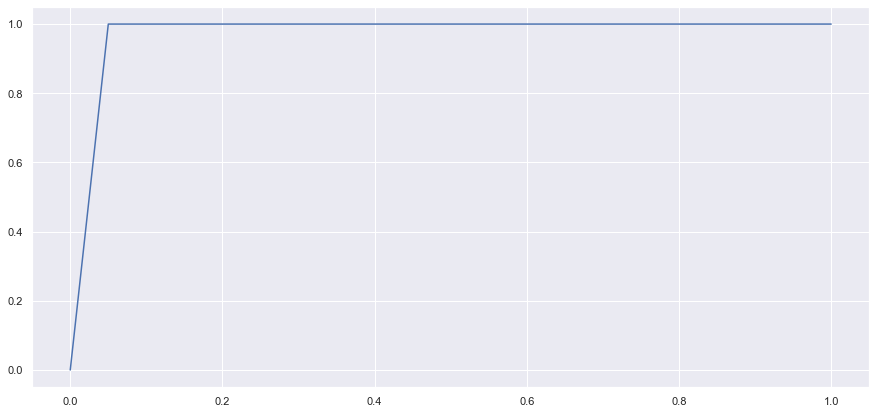

In [73]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0).fit(training_set)

# -1 anomalie
r = clf.predict(testing_set) 

print("IF results: ", r)

r = - np.where(r==-1, r, 0)
 
print("converted IF results: ",r)

# 1 -> anomalies. 0 -> normal
print("true labels: ", y)

count_similar_predictions = np.count_nonzero(r == y)
per_similar_predictions = count_similar_predictions/len(testing_set)

print("count_similar_predictions: ", count_similar_predictions)
print("per_similar_predictions: ", per_similar_predictions)

auc = metrics.roc_auc_score(y, r)

print("auc: ", auc)

fpr, tpr, _ = metrics.roc_curve(y, r)
print("fpr, tpr: ", fpr, tpr)

plt.plot(fpr,tpr);

In [74]:
[np.count_nonzero(pac_rpad_pred == y) for _, pac_rpad_pred in enumerate(pac_rpad_converted_predictions)]

[36, 36, 36, 36, 36, 34, 31, 21, 21, 20]